# Regression between sea level height and the timmerman wind data regions for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [199]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs


data_type = 'era5'
model = 'Timmerman'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Plot Timmerman regions

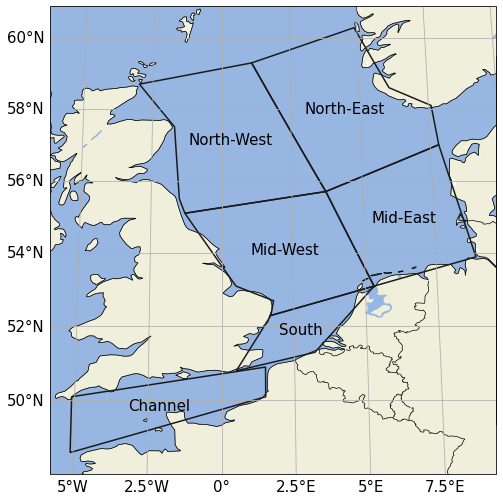

In [200]:
figs.timmerman_regions_plot()

#### Import and plot tide gauge data

In [201]:
# Open data file
tg_data = imprt.import_obs_slh_data()

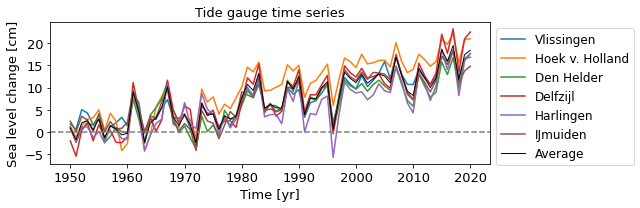

In [202]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [203]:
wind_data_era5 = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [204]:
wind_data_era5

Channel                South             Mid-West            \
          u$^2$     v$^2$      u$^2$     v$^2$      u$^2$     v$^2$   
time                                                                  
1950  12.350291  2.171068   8.262183  4.041305   8.584405  4.609705   
1951   9.173002  3.294943   4.721186  6.609374   6.462471  7.438522   
1952   7.513128 -0.765219   5.772462  0.936855   7.444201 -0.193246   
1953   4.369887  0.869921   5.077993  2.553824   7.646784  3.443362   
1954  13.193830  0.525023  13.136430  2.714039  13.472046  3.240453   
...         ...       ...        ...       ...        ...       ...   
2016   7.013076  1.724997   4.492962  3.094546   5.532615  3.626648   
2017  11.651821  0.402998  10.108109  2.040739  13.155661  2.520331   
2018   5.177164  1.818118   3.098964  2.625134   4.536352  4.291521   
2019   8.481819  1.689569   6.476494  4.163897   8.741339  4.177894   
2020  12.565866  2.792563  10.073592  6.292929  12.320718  6.441253   

       Mid-East           North-West           North-East            
          u$^2$     v$^2$      u$^2$     v$^2$      u$^2$     v$^2$  
time                                                                 
1950   8.101027  2.522368   7.013565  7.557420   3.963465  5.090486  
1951   6.362149  5.580308   5.833830  9.635615   2.495542  9.651013  
1952   8.791636 -0.327027   7.919094 -1.071391   5.058083  0.185943  
1953   9.280859  2.147830   8.386577  5.926245   6.155785  4.151612  
1954  10.562153  4.062375   8.128158  4.496390   3.434881  5.007951  
...         ...       ...        ...       ...        ...       ...  
2016   6.214812  2.229459   6.361533  4.413408   3.942846  3.561393  
2017  14.493663  1.323550  13.115123  2.379122   9.838213  1.489570  
2018   3.704020  2.986358   3.926987  7.248913   1.370968  5.384105  
2019   9.809879  2.972926   6.251465  3.867711   3.544831  2.255315  
2020  13.922107  5.687397  12.519497  7.455038  10.445914  5.882553  

[71 rows x 12 columns]

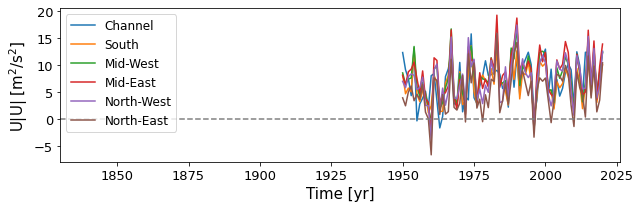

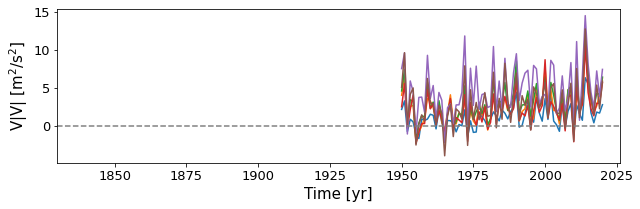

In [205]:
figs.plot_obs_wind_data(wind_data_era5, model = model, data_type = data_type, title = False)

### Perform regression

In [206]:
results_era5, timeseries_era5, significance_era5, r2_df = regres.regression_obs(wind_data_era5, 
                                                                                tg_data, 
                                                                                wind_model = model, 
                                                                                data_type = data_type)

In [207]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, u^2}$","R$^2_{adj, v^2}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.843684,0.258693,0.319832,0.001479,0.706408,0.817631,0.135142,0.206471,-0.164941,0.657476
Hoek v. Holland,0.918656,0.233874,0.293162,0.030893,0.7783,0.90816,0.135019,0.201957,-0.094153,0.749693
Den Helder,0.833136,0.37891,0.376603,0.050861,0.60773,0.817493,0.320683,0.318159,-0.03812,0.570955
Delfzijl,0.850787,0.318607,0.336836,0.002841,0.66757,0.836798,0.254727,0.274664,-0.090643,0.636404
Harlingen,0.825354,0.474026,0.488561,0.000001,0.522727,0.802819,0.406159,0.422569,-0.129031,0.461144
IJmuiden,0.805514,0.311553,0.315227,0.026281,0.635258,0.790554,0.258596,0.262552,-0.04862,0.607201
Average,0.888603,0.338072,0.365216,0.002855,0.69565,0.876226,0.264524,0.294685,-0.107938,0.661833


In [208]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend
station,,,,,,,,,,,,,,,,,,,
Vlissingen,0.843581,0.258689,0.319827,0.001454,2.021567,7.348812,0.657090,-0.080843,-1.030815,-0.000000,-0.000000,-0.0,2.600329,-0.004686,0.954080,-1.009298,-1.503115,0.317547,3.963151
Hoek v. Holland,0.918616,0.233871,0.293159,0.030872,1.902320,9.960944,0.574655,0.346194,0.269667,-0.785404,0.000000,0.0,1.885133,-0.069623,-0.000000,-0.409169,-0.000000,0.000000,5.541572
Den Helder,0.832742,0.378882,0.376568,0.050538,2.114716,6.357774,0.405192,0.470666,0.146093,0.000000,0.000000,0.0,1.776997,0.000000,-0.000000,-0.915001,-0.000000,-0.000000,3.503097
Delfzijl,0.849683,0.318525,0.336751,0.000000,2.596658,7.614678,0.007490,0.016911,0.000000,0.000000,0.000000,0.0,2.701946,0.000000,0.000000,-0.017782,0.000000,-0.360001,4.824488
Harlingen,0.824768,0.473995,0.488528,0.000000,2.290039,5.832838,0.697126,0.051323,0.062069,0.000000,0.253063,0.0,1.388168,-0.000000,0.833521,-0.481673,0.000000,-0.000000,3.244835
IJmuiden,0.804067,0.311385,0.315029,0.023611,2.301400,7.142322,0.289275,0.281206,0.000000,0.000000,0.000000,0.0,1.681510,-0.000000,0.000000,-0.640124,-0.000000,-0.000000,3.622387
Average,0.888545,0.338068,0.365211,0.002789,1.853339,7.376228,0.434499,0.202122,0.000000,0.000000,0.000000,0.0,2.085501,-0.037488,0.000000,-0.714873,-0.065615,-0.000000,4.164980


In [209]:
timeseries_era5

Vlissingen                                                       \
     Channel u$^2$ Channel v$^2$ South u$^2$ South v$^2$ Mid-West u$^2$   
time                                                                      
1950      0.850350     -0.047733   -0.535341        -0.0           -0.0   
1951      0.317777     -0.104597    0.578340        -0.0            0.0   
1952      0.039551      0.100830    0.247703         0.0            0.0   
1953     -0.487315      0.018099    0.466120        -0.0            0.0   
1954      0.991743      0.035549   -2.068343        -0.0           -0.0   
...            ...           ...         ...         ...            ...   
2016     -0.044267     -0.025164    0.650119        -0.0            0.0   
2017      0.733273      0.041723   -1.115904         0.0           -0.0   
2018     -0.352001     -0.029876    1.088546        -0.0            0.0   
2019      0.201921     -0.023372    0.026277        -0.0           -0.0   
2020      0.886484     -0.079178   -1.105048        -0.0           -0.0   

                                                                    \
     Mid-West v$^2$ Mid-East u$^2$ Mid-East v$^2$ North-West u$^2$   
time                                                                 
1950           -0.0      -0.128609      -0.000877        -0.097622   
1951           -0.0      -1.156653      -0.007286        -0.367656   
1952            0.0       0.279686       0.005094         0.109649   
1953           -0.0       0.568920      -0.000092         0.216653   
1954           -0.0       1.326435      -0.004105         0.157502   
...             ...            ...            ...              ...   
2016           -0.0      -1.243760      -0.000263        -0.246868   
2017            0.0       3.650786       0.001635         1.298989   
2018           -0.0      -2.728168      -0.001850        -0.804121   
2019           -0.0       0.881683      -0.001821        -0.272062   
2020           -0.0       3.312876      -0.007510         1.162654   

                       ...   Average                                        \
     North-West v$^2$  ...     trend      total wind total   Channel South   
time                   ...                                                   
1950        -0.869370  ... -7.113058  -7.138009  -0.024952  0.681633   0.0   
1951        -1.500812  ... -6.909827  -8.444157  -1.534330  0.471637   0.0   
1952         1.752424  ... -6.706597  -5.424527   1.282070 -0.225938   0.0   
1953        -0.373750  ... -6.503367  -6.695992  -0.192625 -0.367486   0.0   
1954         0.060699  ... -6.300137  -4.631399   1.668737  0.566908   0.0   
...               ...  ...       ...        ...        ...       ...   ...   
2016         0.085913  ...  6.300137   5.414687  -0.885450  0.033643   0.0   
2017         0.704014  ...  6.503367  10.248376   3.745009  0.380560   0.0   
2018        -0.775632  ...  6.706597   3.857427  -2.849170 -0.158065   0.0   
2019         0.251718  ...  6.909827   7.998705   1.088878  0.191953   0.0   
2020        -0.838262  ...  7.113058   9.815310   2.702252  0.784144   0.0   

                                                            
     Mid-West  Mid-East North-West u$^2$ total v$^2$ total  
time                                                        
1950      0.0 -0.110165  -0.615764    0.478489   -0.503440  
1951      0.0 -0.985944  -1.063007   -0.674540   -0.859790  
1952      0.0  0.265071   1.241220    0.252182    1.029889  
1953      0.0  0.455544  -0.264723    0.118086   -0.310711  
1954      0.0  1.030980   0.042992    1.747463   -0.078726  
...       ...       ...        ...         ...         ...  
2016      0.0 -0.999620   0.060851   -1.007109    0.121659  
2017      0.0  2.941067   0.498644    3.337596    0.407413  
2018      0.0 -2.202828  -0.549371   -2.359696   -0.489474  
2019      0.0  0.692550   0.178289    0.866728    0.222149  
2020      0.0  2.596888  -0.593730    3.158111   -0.455859  

[71 rows x 154 columns]

In [210]:
timeseries_era5['Average'].max()

Channel u$^2$        0.944812
Channel v$^2$        0.648100
South u$^2$          0.000000
South v$^2$          0.000000
Mid-West u$^2$       0.000000
Mid-West v$^2$       0.000000
Mid-East u$^2$       5.191380
Mid-East v$^2$       0.074425
North-West u$^2$    -0.000000
North-West v$^2$     1.488655
North-East u$^2$     0.189159
North-East v$^2$    -0.000000
trend                7.113058
total               10.248376
wind total           5.861603
Channel              1.216277
South                0.000000
Mid-West             0.000000
Mid-East             5.221909
North-West           1.488655
u$^2$ total          5.279193
v$^2$ total          1.268649
dtype: float64

In [211]:
timeseries_era5['Average'].std()

Channel u$^2$       0.437591
Channel v$^2$       0.203560
South u$^2$         0.000000
South v$^2$         0.000000
Mid-West u$^2$      0.000000
Mid-West v$^2$      0.000000
Mid-East u$^2$      2.100345
Mid-East v$^2$      0.037755
North-West u$^2$    0.000000
North-West v$^2$    0.719961
North-East u$^2$    0.066082
North-East v$^2$    0.000000
trend               4.194624
total               5.227767
wind total          2.458453
Channel             0.558370
South               0.000000
Mid-West            0.000000
Mid-East            2.095604
North-West          0.719961
u$^2$ total         2.309418
v$^2$ total         0.632327
dtype: float64

In [212]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Channel u$^2$,True,True,True,True,True,True,True
Channel v$^2$,True,True,True,True,True,True,True
South u$^2$,True,True,True,True,True,True,True
South v$^2$,True,True,True,True,True,True,True
Mid-West u$^2$,True,True,True,True,True,True,True
Mid-West v$^2$,True,True,True,True,True,True,True
Mid-East u$^2$,True,True,True,True,True,True,True
Mid-East v$^2$,False,False,False,False,True,False,False
North-West u$^2$,True,True,True,True,True,True,True


#### Plot regression results

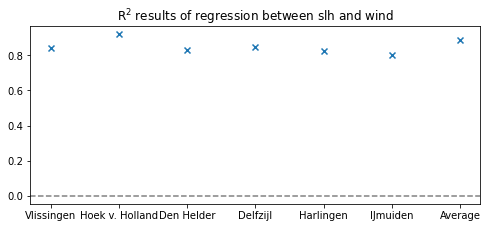

In [213]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, data_type)

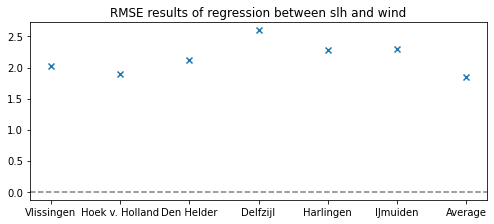

In [214]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, data_type)

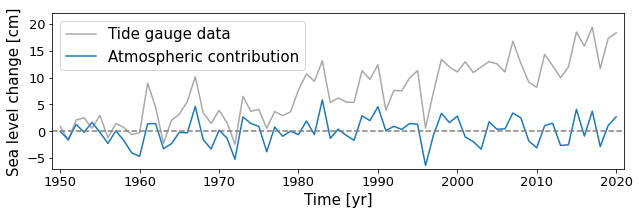

In [215]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_era5, 'Average', model, 'era5', title = False)

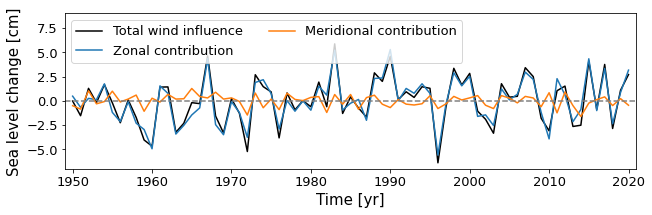

In [216]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_era5, 'Average', model, 'era5', title = False)

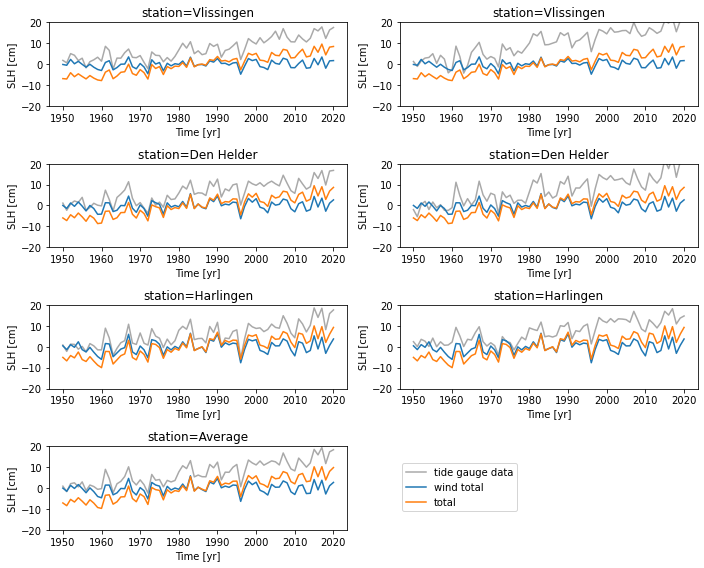

In [217]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total', 'total'], model, data_type)

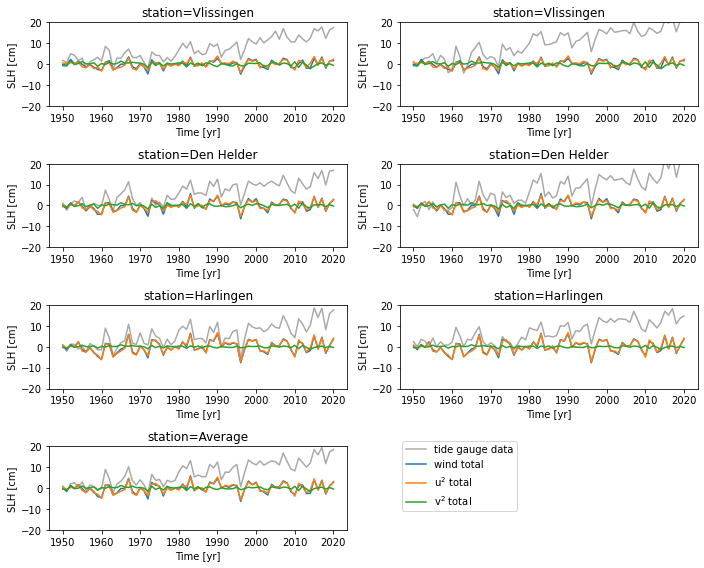

In [218]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total', 'u$^2$ total', 'v$^2$ total'], model, data_type)

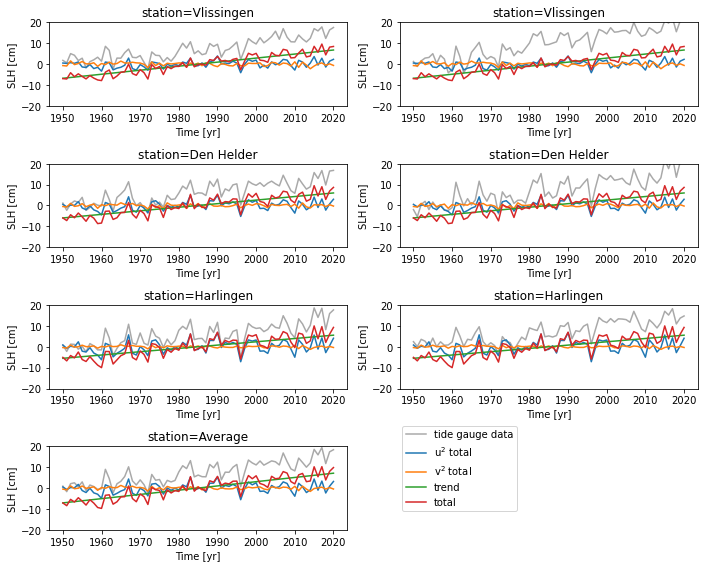

In [219]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type)

#### Plot trends

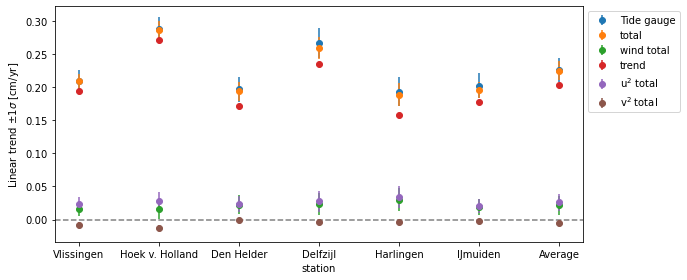

In [220]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], model, data_type)

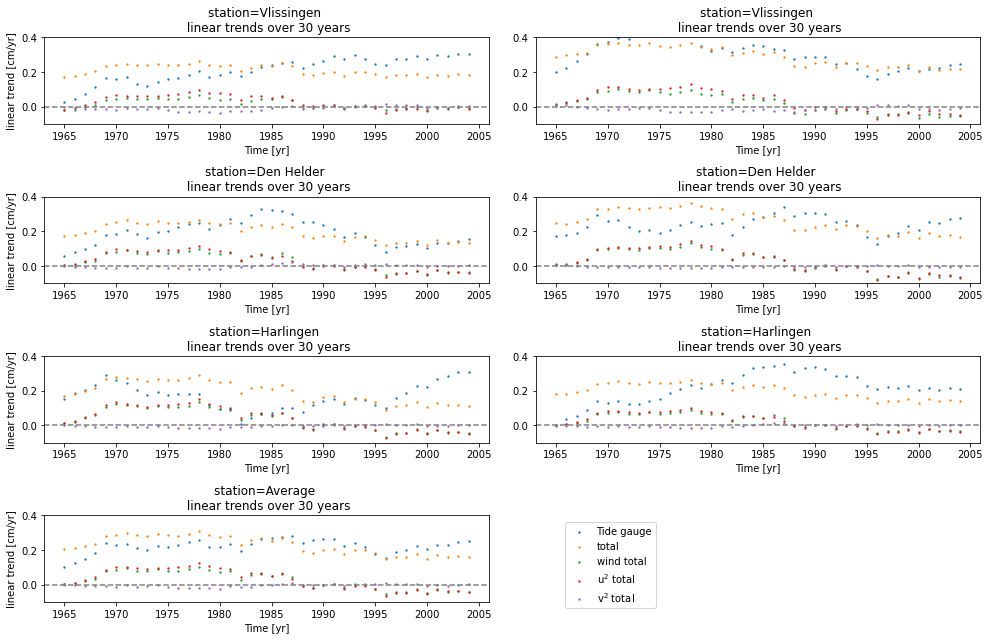

In [221]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 30, model, data_type, errorbar = False)

## 20cr observational data

In [222]:
data_type = '20cr'

#### Import and plot tide gauge data

In [223]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = data_type)

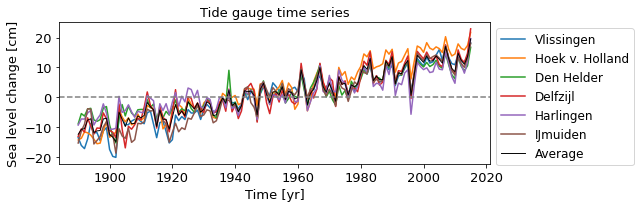

In [224]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [225]:
wind_data_20cr = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [226]:
wind_data_20cr

Channel                South             Mid-West             \
          u$^2$     v$^2$      u$^2$     v$^2$      u$^2$      v$^2$   
time                                                                   
1836   9.398874 -1.218150   6.401690  0.310869   6.692063  -1.423788   
1837   3.329904  0.750914   2.035330  1.325370   3.044824   1.955889   
1838   0.329219 -0.767287  -0.266823 -0.360828  -1.300336  -1.106671   
1839   4.823160  0.552025   2.080075  0.976965   2.073684   1.277253   
1840   0.741866 -0.182480   4.820944 -0.441465   6.431440  -1.902902   
...         ...       ...        ...       ...        ...        ...   
2011  10.969078  3.115381   8.155463  3.485028  13.435661   6.483733   
2012  10.027008  1.991190   6.809952  2.736764  10.189938   1.982328   
2013   3.313218  1.547087   2.263472  2.715020   5.177427   4.285154   
2014  10.876112  6.425111   5.115736  9.385818   7.802488  13.314934   
2015  10.918869  6.242378  10.573762  5.000158  17.265608   6.761311   

       Mid-East            North-West            North-East             
          u$^2$      v$^2$      u$^2$      v$^2$      u$^2$      v$^2$  
time                                                                    
1836   5.914341  -0.938669   4.039640  -1.211254   2.221467  -1.732220  
1837   1.566807   1.638099   2.953883   2.951589   0.155643   3.296363  
1838  -1.807967  -0.944153  -0.071450   1.847939  -2.106020   0.592806  
1839  -0.375581   1.146095   1.792541   3.554612  -1.421507   3.026562  
1840   8.379648  -2.250757   6.112606  -2.001526   4.964725  -2.783268  
...         ...        ...        ...        ...        ...        ...  
2011  13.715880   5.262648  14.429358  11.633640  10.596898   9.564071  
2012  10.420673   2.108283  10.758274   0.440513   6.598078   2.038419  
2013   5.956827   3.209796   8.885650   7.610978   6.540488   5.776588  
2014   5.428218  11.872807   7.111277  17.830263   0.915726  18.478556  
2015  18.294571   4.461973  18.431528   9.313465  13.466646   8.660346  

[180 rows x 12 columns]

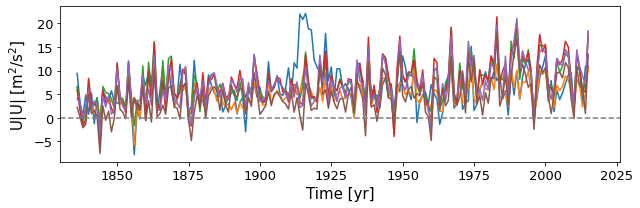

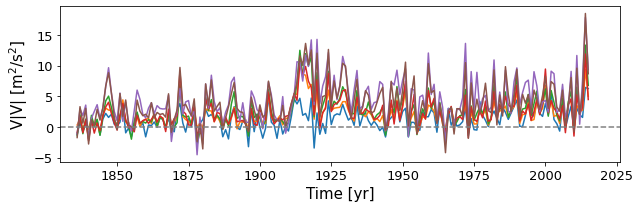

In [227]:
figs.plot_obs_wind_data(wind_data_20cr, model = model, data_type = data_type, title = False)

### Perform regression

In [228]:
results_20cr, timeseries_20cr, significance_20cr, r2_df = regres.regression_obs(wind_data_20cr, tg_data, wind_model = model, data_type = data_type)

In [229]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, u^2}$","R$^2_{adj, v^2}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.922948,0.345183,0.22707,0.119674,0.889893,0.918377,0.306338,0.181218,0.067451,0.883361
Hoek v. Holland,0.942133,0.312373,0.260094,0.0991,0.901032,0.9387,0.271582,0.216201,0.045657,0.895161
Den Helder,0.882286,0.425838,0.366418,0.125182,0.769269,0.876351,0.396889,0.334473,0.081074,0.757635
Delfzijl,0.904961,0.448022,0.368914,0.125133,0.799986,0.90017,0.420191,0.337094,0.081022,0.789902
Harlingen,0.864307,0.501513,0.453069,0.088454,0.688735,0.857466,0.47638,0.425493,0.042494,0.673041
IJmuiden,0.903892,0.331161,0.260275,0.117644,0.851716,0.898191,0.291484,0.216393,0.065301,0.84292
Average,0.944176,0.398172,0.310025,0.127621,0.869567,0.939322,0.345839,0.250027,0.051762,0.858225


In [230]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend
station,,,,,,,,,,,,,,,,,,,
Vlissingen,0.922883,0.345176,0.227060,0.119644,2.449529,-5.432718,-0.00000,1.036493,0.323092,-0.000000,0.475648,-1.180959,0.340738,-0.0,0.474172,-0.000000,0.000000,0.000000,10.698859
Hoek v. Holland,0.941896,0.312351,0.260067,0.098842,2.305265,-3.915282,0.00000,0.670303,0.688304,-0.000000,0.299567,-0.000000,0.368070,-0.0,0.647076,-0.593547,0.000000,-0.000000,11.667401
Den Helder,0.881612,0.425795,0.366368,0.124559,2.290281,-2.650715,-0.00000,0.709219,0.000000,-0.000000,0.704140,-0.000000,1.452244,-0.0,0.082163,-0.589532,0.000000,-0.000000,6.839221
Delfzijl,0.904372,0.447996,0.368884,0.124827,2.585231,-3.971877,-0.00000,0.964695,0.272439,0.000000,1.147925,-0.000000,0.000000,-0.0,0.000000,-0.415387,1.477954,-0.000000,8.726263
Harlingen,0.862248,0.501405,0.452953,0.085484,2.321939,-2.081907,0.00000,0.490295,0.928531,0.000000,0.000000,-0.000000,0.872644,-0.0,1.063215,-0.000000,0.007073,-0.000000,5.560761
IJmuiden,0.903764,0.331151,0.260261,0.117596,2.733122,-5.529566,-0.00000,1.045724,0.000000,-0.000000,0.557792,0.000000,1.107990,0.0,0.152807,-1.110588,0.000000,0.188162,10.312595
Average,0.944169,0.398172,0.310024,0.127618,1.859763,-3.989615,0.12291,1.070923,0.425256,-0.312435,0.256843,-0.000000,0.742710,0.0,0.809698,-0.779866,0.000000,0.131724,9.094395


In [231]:
timeseries_20cr['Average']

,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,...,trend,total,wind total,Channel,South,Mid-West,Mid-East,North-West,u$^2$ total,v$^2$ total
time,,,,,,,,,,,,,,,,,,,,,
1836,0.083306,-1.463176,0.214974,0.283643,-0.041568,0.0,-0.234380,-0.0,-0.520935,1.239256,...,-15.664685,-16.318132,-0.653448,-1.379869,0.498617,-0.041568,-0.234380,0.718321,-0.498602,-0.154846
1837,-0.085531,-0.266931,-0.442154,0.123204,-0.261243,0.0,-0.914671,-0.0,-0.720630,0.339024,...,-15.489660,-17.743419,-2.253759,-0.352462,-0.318950,-0.261243,-0.914671,-0.381606,-2.424229,0.170470
1838,-0.169009,-1.189268,-0.788623,0.389869,-0.522955,0.0,-1.442747,-0.0,-1.277057,0.577693,...,-15.314636,-19.863573,-4.548937,-1.358277,-0.398754,-0.522955,-1.442747,-0.699364,-4.200392,-0.348545
1839,-0.043989,-0.387760,-0.435420,0.178303,-0.319736,0.0,-1.218611,-0.0,-0.934227,0.208618,...,-15.139611,-18.127440,-2.987828,-0.431749,-0.257117,-0.319736,-1.218611,-0.725609,-2.951983,-0.035846
1840,-0.157530,-0.833986,-0.022925,0.402621,-0.057265,0.0,0.151385,-0.0,-0.139669,1.410155,...,-14.964587,-14.466028,0.498559,-0.991516,0.379697,-0.057265,0.151385,1.270486,-0.226004,0.724563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0.126989,1.169529,0.478913,-0.218336,0.364603,-0.0,0.986385,0.0,1.389970,-1.538504,...,14.964587,17.935807,2.971220,1.296518,0.260578,0.364603,0.986385,-0.148535,3.346861,-0.375641
2012,0.100781,0.486561,0.276417,-0.100001,0.169111,0.0,0.470760,-0.0,0.714774,0.882055,...,15.139611,18.067776,2.928164,0.587342,0.176415,0.169111,0.470760,1.596829,1.731843,1.196322
2013,-0.085995,0.216759,-0.407819,-0.096562,-0.132795,-0.0,-0.227732,0.0,0.370356,-0.668587,...,15.314636,14.351019,-0.963617,0.130764,-0.504381,-0.132795,-0.227732,-0.298231,-0.483985,-0.479632


In [232]:
timeseries_20cr['Average'].max()

Channel u$^2$        0.437333
Channel v$^2$        3.180253
South u$^2$          1.117499
South v$^2$          0.517706
Mid-West u$^2$       0.710127
Mid-West v$^2$       0.000000
Mid-East u$^2$       2.191892
Mid-East v$^2$      -0.000000
North-West u$^2$     2.611922
North-West v$^2$     1.957281
North-East u$^2$    -0.000000
North-East v$^2$     0.548038
trend               15.664685
total               22.809436
wind total           7.144751
Channel              3.304656
South                0.969722
Mid-West             0.710127
Mid-East             2.191892
North-West           2.984226
u$^2$ total          6.207651
v$^2$ total          1.935906
dtype: float64

In [233]:
timeseries_20cr['Average'].std()

Channel u$^2$        0.123253
Channel v$^2$        1.073910
South u$^2$          0.426442
South v$^2$          0.313307
Mid-West u$^2$       0.257559
Mid-West v$^2$       0.000000
Mid-East u$^2$       0.744782
Mid-East v$^2$       0.000000
North-West u$^2$     0.811956
North-West v$^2$     0.782042
North-East u$^2$     0.000000
North-East v$^2$     0.132091
trend                9.119763
total               10.386113
wind total           2.368262
Channel              1.116535
South                0.438375
Mid-West             0.257559
Mid-East             0.744782
North-West           1.095755
u$^2$ total          2.189265
v$^2$ total          0.772068
dtype: float64

In [234]:
significance_20cr.T

reggression_contributor,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend,total,wind total
Vlissingen,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Hoek v. Holland,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Den Helder,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Delfzijl,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Harlingen,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
IJmuiden,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Average,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True


In [235]:
import xarray as xr
test = xr.Dataset.from_dataframe(significance_20cr.T).rename({'index':'station'})

In [236]:
test

<xarray.Dataset>
Dimensions:           (station: 7)
Coordinates:
  * station           (station) object 'Vlissingen' ... 'Average'
Data variables: (12/15)
    Channel u$^2$     (station) bool False False False False False False False
    Channel v$^2$     (station) bool True True True True True True True
    South u$^2$       (station) bool True True True True True True True
    South v$^2$       (station) bool False False False False False False False
    Mid-West u$^2$    (station) bool True True True True True True True
    Mid-West v$^2$    (station) bool False False False False False False False
    ...                ...
    North-West v$^2$  (station) bool False False False False False False False
    North-East u$^2$  (station) bool True True True True True True True
    North-East v$^2$  (station) bool False False False False False False False
    trend             (station) bool True True True True True True True
    total             (station) bool True True True True True True True
    wind total        (station) bool True True True True True True True

#### Plot regression results

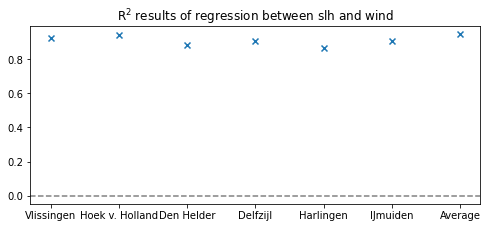

In [237]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, data_type)

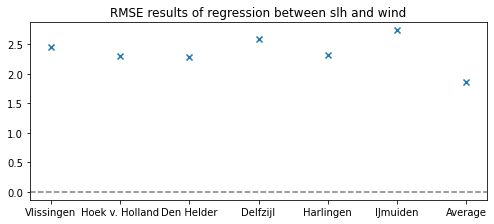

In [238]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, data_type)

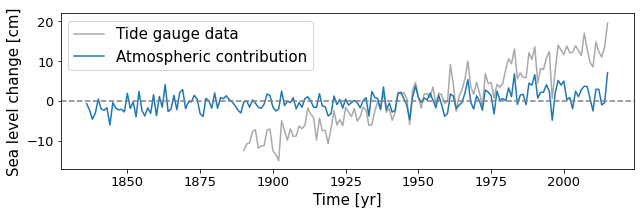

In [239]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False)

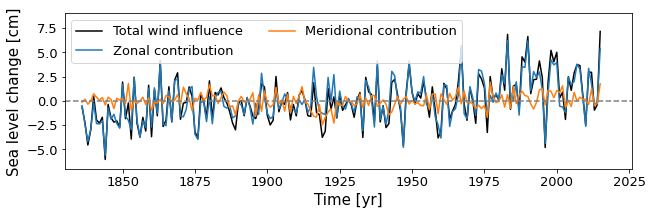

In [240]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False)

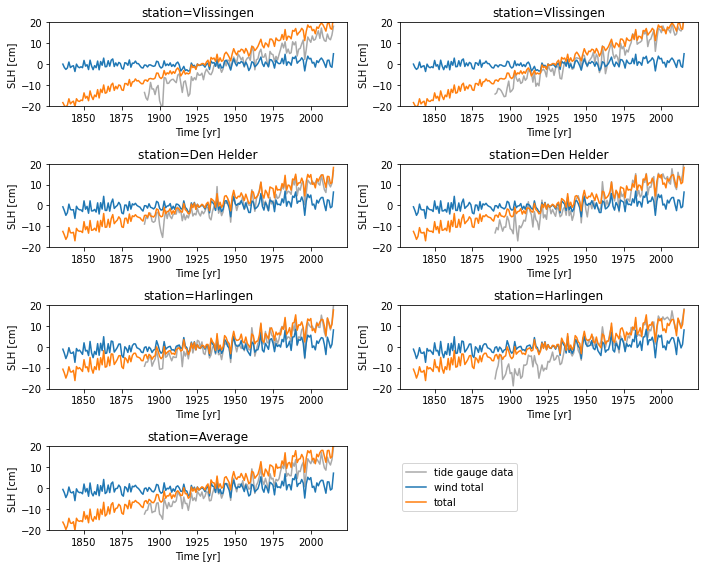

In [241]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total', 'total'], model, data_type)

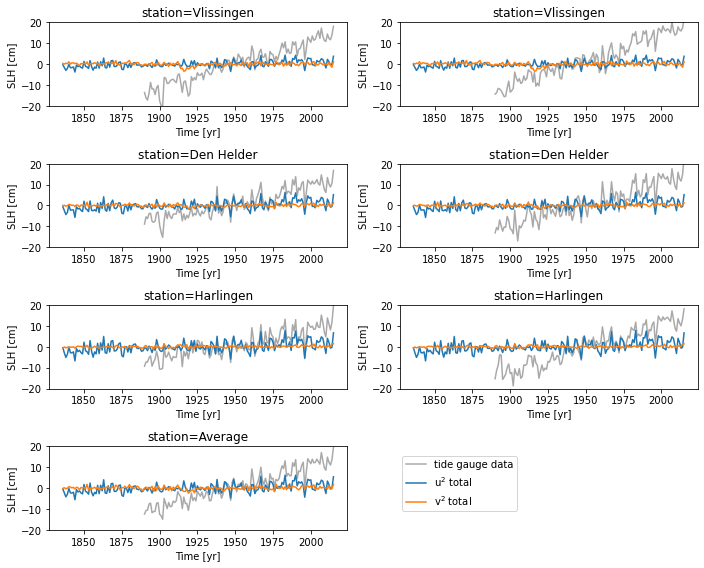

In [242]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$ total', 'v$^2$ total'], model, data_type)

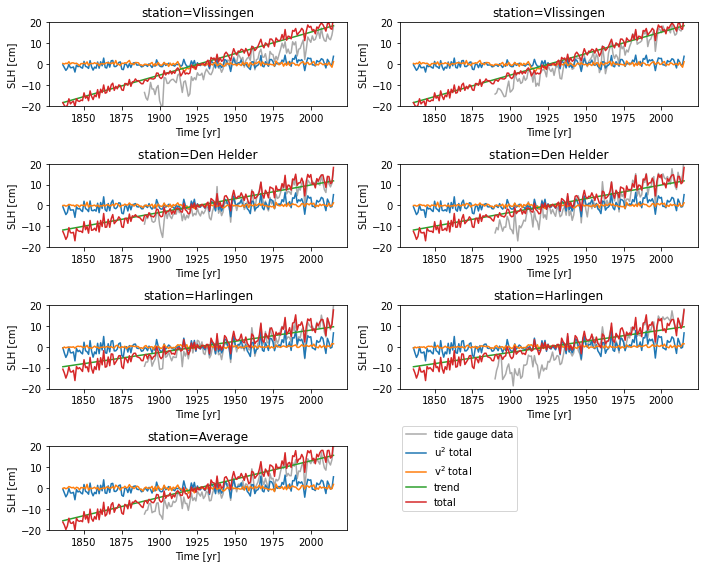

In [243]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type)

#### Plot trends

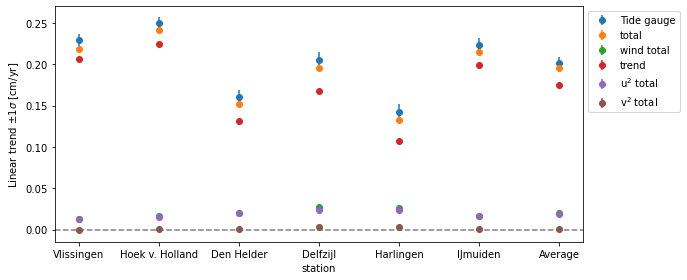

In [244]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], model, data_type)

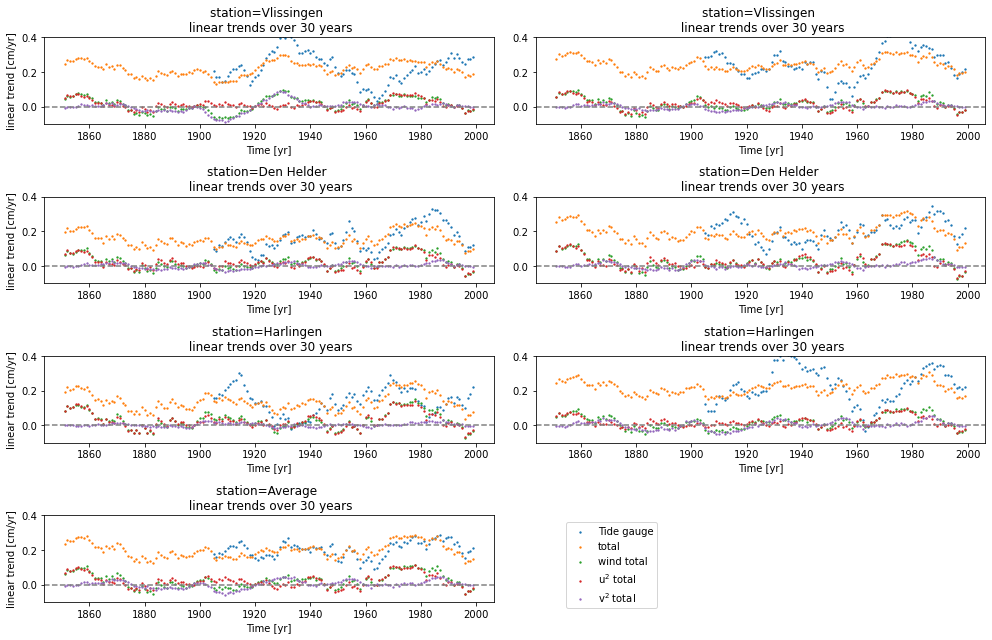

In [245]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 30, model, data_type, errorbar = False)

#### Calculate trends

In [246]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

periods = ['1950-2015', '1950-2020', '1836-2015', '1890-2015']
df = pd.DataFrame({'period':periods, 'trend': [np.nan, np.nan, np.nan, np.nan], 'se': [np.nan, np.nan, np.nan, np.nan]})
df = df.set_index('period')

df = pd.concat([df, df, df], keys = ['ERA5', '20CRv3', 'tg_data'], axis=1)

# ERA5 trends
df['ERA5', 'trend']['1950-2015'] = linregress(timeseries_era5.loc[1950:2015].index, timeseries_era5['Average', 'wind total'].loc[1950:2015].values).slope*10
df['ERA5', 'trend']['1950-2020'] = linregress(timeseries_era5.index, timeseries_era5['Average', 'wind total'].values).slope*10

# ERA5 standard errors
df['ERA5', 'se']['1950-2015'] = linregress(timeseries_era5.loc[1950:2015].index, timeseries_era5['Average', 'wind total'].loc[1950:2015].values).stderr*10
df['ERA5', 'se']['1950-2020'] = linregress(timeseries_era5.index, timeseries_era5['Average', 'wind total'].values).stderr*10

# 20CRv3 trends
df['20CRv3', 'trend']['1950-2015'] = linregress(timeseries_20cr.loc[1950:2015].index, timeseries_20cr['Average', 'wind total'].loc[1950:2015].values).slope*10
df['20CRv3', 'trend']['1836-2015'] = linregress(timeseries_20cr.index, timeseries_20cr['Average', 'wind total'].values).slope*10
df['20CRv3', 'trend']['1890-2015'] = linregress(timeseries_20cr.loc[1890:2015].index, timeseries_20cr['Average', 'wind total'].loc[1890:2015].values).slope*10


# 20CRv3 standard errors
df['20CRv3', 'se']['1950-2015'] = linregress(timeseries_20cr.loc[1950:2015].index, timeseries_20cr['Average', 'wind total'].loc[1950:2015].values).stderr*10
df['20CRv3', 'se']['1836-2015'] = linregress(timeseries_20cr.index, timeseries_20cr['Average', 'wind total'].values).stderr*10
df['20CRv3', 'se']['1890-2015'] = linregress(timeseries_20cr.loc[1890:2015].index, timeseries_20cr['Average', 'wind total'].loc[1890:2015].values).stderr*10


# Tide gauge trends
df['tg_data', 'trend']['1950-2015'] = linregress(tg_data.loc[1950:2015].index, tg_data['Average'].loc[1950:2015].values).slope*10
df['tg_data', 'trend']['1890-2015'] = linregress(tg_data.loc[1890:2015].index, tg_data['Average'].loc[1890:2015].values).slope*10
df['tg_data', 'trend']['1950-2020'] = linregress(tg_data.loc[1950:2020].index, tg_data['Average'].loc[1950:2020].values).slope*10

# Tide gauge standard errors
df['tg_data', 'se']['1950-2015'] = linregress(tg_data.loc[1950:2015].index, tg_data['Average'].loc[1950:2015].values).stderr*10
df['tg_data', 'se']['1890-2015'] = linregress(tg_data.loc[1890:2015].index, tg_data['Average'].loc[1890:2015].values).stderr*10
df['tg_data', 'se']['1950-2020'] = linregress(tg_data.loc[1950:2020].index, tg_data['Average'].loc[1950:2020].values).stderr*10



df


ERA5              20CRv3             tg_data          
              trend        se     trend        se     trend        se
period                                                               
1950-2015  0.207131  0.157686  0.416378  0.157571  2.244302  0.199460
1950-2020  0.213147  0.141080       NaN       NaN  2.244302  0.199460
1836-2015       NaN       NaN  0.200894  0.030559       NaN       NaN
1890-2015       NaN       NaN  0.263011  0.052630  2.017917  0.070184

In [247]:
(0.42/2.2)*100

19.09090909090909

### 